# Stock Market Prediction

## Overview

In this project to use the S&P500 data, a Linear Regression, and a Random Forest Ensemble Supervised Learning Model to predict the overall Stock Market and if tomorrow's price will go up or down in direction.

I choose to use the s&p500 data because the S&P500 index is a representation of the top 500 companies in the United States and represents the state of the US Economy. 

This will allow for a better understanding of the potential direction the markets are in and allow me or someone else to use this data to guide invesment strategies and assess risk for investors.


In [1]:
# Libraries
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import mplfinance as mpf


import statsmodels.api as sm

# Model Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report ,plot_precision_recall_curve
from sklearn.metrics import mean_squared_error,precision_score, mean_absolute_error,r2_score

## Data

For this project I will utilize Yahoo Finance's API- yfinance to get the historical data for the sp500.

The Data is daily ranging from 1927 to Current Day

In [2]:
ticker_symbol = '^GSPC'

In [3]:
# Creates a class for the Ticker symbol for the sp500 containing data from yahoo finance's api
sp500 = yf.Ticker(ticker_symbol)

In [4]:
#Historical Data
sp500_df = sp500.history(period = "Max")

In [5]:
sp500_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-04-24 00:00:00-04:00,4132.069824,4142.410156,4117.770020,4137.040039,3290940000,0.0,0.0
2023-04-25 00:00:00-04:00,4126.430176,4126.430176,4071.379883,4071.629883,3978640000,0.0,0.0
2023-04-26 00:00:00-04:00,4087.780029,4089.669922,4049.350098,4055.989990,3837030000,0.0,0.0


## EDA

In [6]:
sp500_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,23941.000000,23941.000000,23941.000000,23941.000000,2.394100e+04,23941.0,23941.0
mean,561.671640,585.236158,578.026109,581.860322,8.667354e+08,0.0,0.0
std,934.715084,928.800815,917.601717,923.557190,1.589331e+09,0.0,0.0
min,0.000000,4.400000,4.400000,4.400000,0.000000e+00,0.0,0.0
25%,9.530000,24.420000,24.420000,24.420000,1.440000e+06,0.0,0.0
50%,40.549999,102.120003,100.519997,101.279999,1.908000e+07,0.0,0.0
75%,954.289978,964.169983,948.000000,955.049988,8.011000e+08,0.0,0.0
max,4804.509766,4818.620117,4780.040039,4796.560059,1.145623e+10,0.0,0.0


In [7]:
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23941 entries, 1927-12-30 00:00:00-05:00 to 2023-04-28 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          23941 non-null  float64
 1   High          23941 non-null  float64
 2   Low           23941 non-null  float64
 3   Close         23941 non-null  float64
 4   Volume        23941 non-null  int64  
 5   Dividends     23941 non-null  float64
 6   Stock Splits  23941 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.5 MB


In [8]:
sp500_df.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [9]:
sp500_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-04-24 00:00:00-04:00,4132.069824,4142.410156,4117.770020,4137.040039,3290940000,0.0,0.0
2023-04-25 00:00:00-04:00,4126.430176,4126.430176,4071.379883,4071.629883,3978640000,0.0,0.0
2023-04-26 00:00:00-04:00,4087.780029,4089.669922,4049.350098,4055.989990,3837030000,0.0,0.0


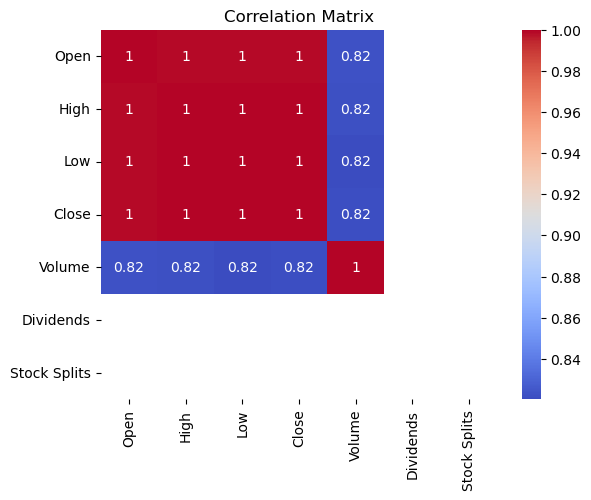

In [10]:
sns.heatmap(sp500_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

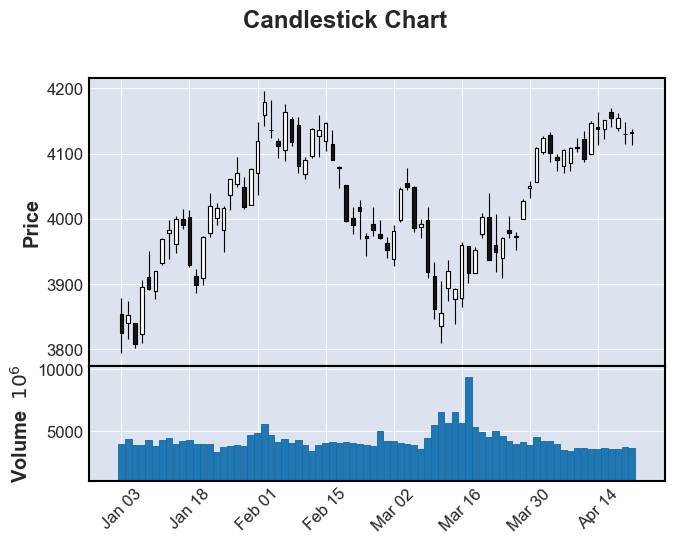

In [11]:
# Create a candlestick chart for this Current year's Data
start_date = '2023-01-01'
end_date = '2023-04-23'
current_year = sp500_df.loc[start_date:end_date]

# Create the candlestick chart
mpf.plot(current_year, type='candle',
         title='Candlestick Chart', ylabel='Price', volume=True)

### Data Cleaning

In [12]:
# Removing unneed Columns (Dividens, Stock Splits) because they only contain 0
sp500_df = sp500_df.drop(columns=['Dividends', 'Stock Splits'])

In [13]:
# Remove Volume = 0 days indicates no movement in stock volumes
sp500_df = sp500_df[sp500_df['Volume'] != 0]

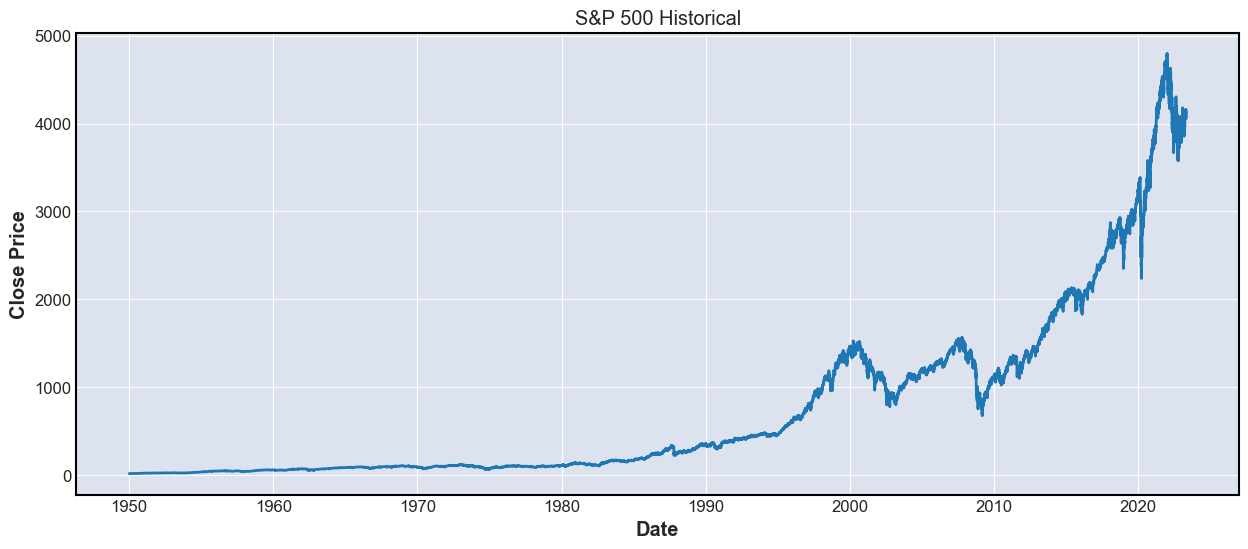

In [14]:
# Create plot for Historical Performance
plt.figure(figsize=(15, 6))
plt.plot(sp500_df['Close'], label='Close')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("S&P 500 Historical")

plt.show()

In [15]:
# Get Daily Return Values to see general returns throughout history
sp500_df['Daily_Return'] = sp500_df['Close'].pct_change()

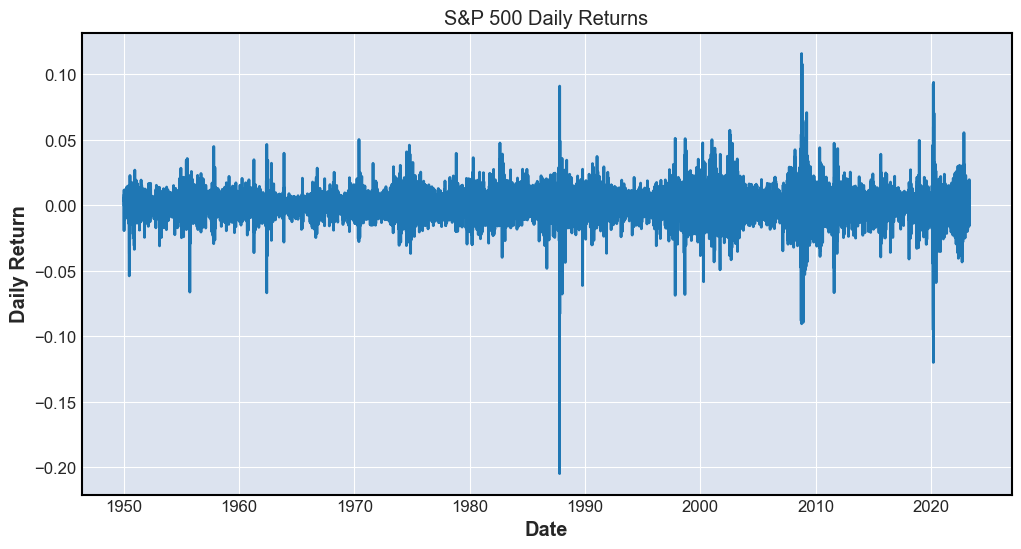

In [16]:
# Plot Historical Daily Returns
plt.figure(figsize=(12, 6))
plt.plot(sp500_df['Daily_Return'])
plt.title('S&P 500 Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()

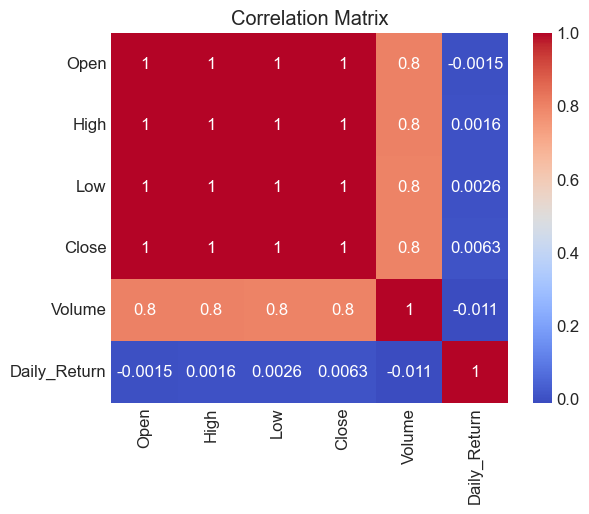

In [17]:
sns.heatmap(sp500_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Model Feature Engineering

In [18]:
# Create shift for Next Day Price 
sp500_df['Next Day Price'] = sp500_df['Close'].shift(-1)

In [19]:
# Create Target Variable for Model
# Create a boolean for if Tomorrow's price is > than Today Price's
sp500_df['Target'] = (sp500_df['Next Day Price'] > sp500_df['Close']).astype(int)

In [20]:
sp500_df

,Open,High,Low,Close,Volume,Daily_Return,Next Day Price,Target
Date,,,,,,,,
1950-01-03 00:00:00-05:00,16.660000,16.660000,16.660000,16.660000,1260000,NaN,16.850000,1
1950-01-04 00:00:00-05:00,16.850000,16.850000,16.850000,16.850000,1890000,0.011405,16.930000,1
1950-01-05 00:00:00-05:00,16.930000,16.930000,16.930000,16.930000,2550000,0.004748,16.980000,1
1950-01-06 00:00:00-05:00,16.980000,16.980000,16.980000,16.980000,2010000,0.002953,17.080000,1
1950-01-09 00:00:00-05:00,17.080000,17.080000,17.080000,17.080000,2520000,0.005889,17.030001,0
...,...,...,...,...,...,...,...,...
2023-04-24 00:00:00-04:00,4132.069824,4142.410156,4117.770020,4137.040039,3290940000,0.000852,4071.629883,0
2023-04-25 00:00:00-04:00,4126.430176,4126.430176,4071.379883,4071.629883,3978640000,-0.015811,4055.989990,0
2023-04-26 00:00:00-04:00,4087.780029,4089.669922,4049.350098,4055.989990,3837030000,-0.003841,4135.350098,1


In [21]:
# Creates Linear Model Data
linear_model_df = sp500_df.copy()

##### NOTE: 
I am filtering for 2000 + data since stock markets environment fundamentally changes through time and I don't want to incorporate noise into the models to get a more accurate representation of the stock market

In [22]:
sp500_df = sp500_df.loc["2000-01-01":].copy()

In [23]:
# Create datasets for RF Model
rf_model_df = sp500_df.copy()

In [24]:
rf_model_df

,Open,High,Low,Close,Volume,Daily_Return,Next Day Price,Target
Date,,,,,,,,
2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000,-0.009549,1399.420044,0
2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,-0.038345,1402.109985,1
2000-01-05 00:00:00-05:00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,0.001922,1403.449951,1
2000-01-06 00:00:00-05:00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,0.000956,1441.469971,1
2000-01-07 00:00:00-05:00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,0.027090,1457.599976,1
...,...,...,...,...,...,...,...,...
2023-04-24 00:00:00-04:00,4132.069824,4142.410156,4117.770020,4137.040039,3290940000,0.000852,4071.629883,0
2023-04-25 00:00:00-04:00,4126.430176,4126.430176,4071.379883,4071.629883,3978640000,-0.015811,4055.989990,0
2023-04-26 00:00:00-04:00,4087.780029,4089.669922,4049.350098,4055.989990,3837030000,-0.003841,4135.350098,1


####  Above we can see that when price goes up the next day Target = 1 and if the price goes down Target = 0

## Model and Training

### Linear Regression Model

In [25]:
# Create Linear Regression Model 
linear_model_df['Numbers'] = list(range(0, len(linear_model_df)))

In [26]:
# Format data correctly for the model
x = np.array(linear_model_df[['Numbers']])

# Try to predict Close value
y = linear_model_df['Close'].values

In [27]:
# Creating Linear Model
linear_model = LinearRegression()

linear_model.fit(x,y)

intercept = linear_model.intercept_
slope = linear_model.coef_

In [28]:
print('Intercept-', intercept)
print('Slope - ', slope)

Intercept- -661.1643769358344
Slope -  [0.15310608]


In [29]:
# Create Predictions from linear regression y = mx+b 
y_pred = slope*x + intercept

linear_model_df['predictions'] = y_pred

# Get R2 Score
r2 = r2_score(linear_model_df['Close'], linear_model_df['predictions'])
print(r2)

0.6768815426960602


<AxesSubplot:xlabel='Date'>

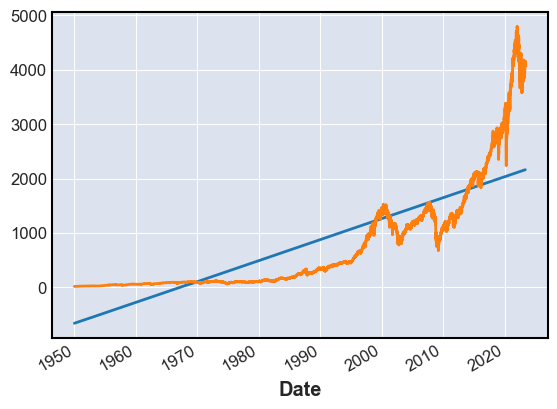

In [30]:
linear_model_df['predictions'].plot()
linear_model_df['Close'].plot()

##### Results of Linear Model

The linear model has an accuracy of 68% based on this model. This score can be improved by creating a possible multi-linear model, however the data doesn't encompass any external factors going on in the world that could add noise or anomolies that effect the stock market(industries specific news, global events, etc.).

The simplisity of the model could be what is leading to a lower accuracy score. I will try to use a Random Forest Model given the data from yfinance to try to get a better model score and instead of trying to predict price, to predict the direction the next day price might be.

### Random Forest

I chose Random Forest because it is easier to avoid overfitting with a RF Models and could pick up on non-linear relationships in the data. Since the Linear Regression model above performed with 67% I will use the RF model to see if it will perform better.

Because this is Time-Series Data we can't use cross-validation because it will lead to a higher r2 and will make the model look perfect, when in reality it is just learning on itself because it knows what the future value would be.

In [31]:
# Random Forest (RF)
rf = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

In [32]:
# Split the data and filter out future data so that it doesn't use future data to predict the past
train = rf_model_df.iloc[:-100]
test = rf_model_df.iloc[-100:]

In [33]:
predictors = ['Close', 'Volume', 'Open', 'High', 'Low']

rf.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [34]:
rf_predictions = rf.predict(test[predictors])

rf_predictions = pd.Series(rf_predictions, index=test.index)

In [35]:
rf_predictions

Date
2022-12-05 00:00:00-05:00    0
2022-12-06 00:00:00-05:00    0
2022-12-07 00:00:00-05:00    0
2022-12-08 00:00:00-05:00    0
2022-12-09 00:00:00-05:00    0
                            ..
2023-04-24 00:00:00-04:00    0
2023-04-25 00:00:00-04:00    0
2023-04-26 00:00:00-04:00    0
2023-04-27 00:00:00-04:00    0
2023-04-28 00:00:00-04:00    0
Length: 100, dtype: int64

In [36]:
confusion_matrix(test['Target'], rf_predictions)

array([[37, 13],
       [41,  9]])

In [37]:
print(classification_report(test['Target'], rf_predictions))

              precision    recall  f1-score   support

           0       0.47      0.74      0.58        50
           1       0.41      0.18      0.25        50

    accuracy                           0.46       100
   macro avg       0.44      0.46      0.41       100
weighted avg       0.44      0.46      0.41       100



In [38]:
precision_score(test['Target'], rf_predictions)

0.4090909090909091

### Hyperparametrizing
Improving the model by adding additional predictors/ indicators to get a better scope of stock market movements/ features

In [39]:
# Calculate Simple Moving Average 30 and 60 days
rf_model_df['SMA 30'] = rf_model_df['Close'].rolling(window=30).mean()
rf_model_df['SMA 60'] = rf_model_df['Close'].rolling(window=60).mean()

#Exponential Moving Average 30 and 60 days
rf_model_df['EMA 30'] = rf_model_df['Close'].ewm(span=30).mean()
rf_model_df['EMA 60'] = rf_model_df['Close'].ewm(span=60).mean()

#Trend Indicator
rf_model_df['Weekly Trend'] = rf_model_df.shift(1).rolling(7).sum()['Target']

# Drop Na Values
rf_model_df = rf_model_df.dropna()

In [40]:
rf_model_df

,Open,High,Low,Close,Volume,Daily_Return,Next Day Price,Target,SMA 30,SMA 60,EMA 30,EMA 60,Weekly Trend
Date,,,,,,,,,,,,,
2000-03-28 00:00:00-05:00,1523.859985,1527.359985,1507.089966,1507.729980,959100000,-0.010585,1508.520020,1,1410.468665,1416.084497,1437.627156,1423.517742,4.0
2000-03-29 00:00:00-05:00,1507.729980,1521.449951,1497.449951,1508.520020,1061900000,0.000524,1487.920044,0,1414.017664,1416.972831,1442.280501,1426.724365,5.0
2000-03-30 00:00:00-05:00,1508.520020,1517.380005,1474.630005,1487.920044,1193400000,-0.013656,1498.579956,1,1417.359330,1418.447831,1445.272880,1429.021567,4.0
2000-03-31 00:00:00-05:00,1487.920044,1519.810059,1484.380005,1498.579956,1227400000,0.007164,1505.969971,1,1421.036662,1420.055664,1448.764321,1431.620346,4.0
2000-04-03 00:00:00-04:00,1498.579956,1507.189941,1486.959961,1505.969971,1021700000,0.004931,1494.729980,0,1426.365995,1421.764331,1452.507436,1434.385481,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-21 00:00:00-04:00,4132.140137,4138.020020,4113.859863,4133.520020,3611750000,0.000903,4137.040039,1,4036.391675,4045.910335,4073.886549,4036.962786,4.0
2023-04-24 00:00:00-04:00,4132.069824,4142.410156,4117.770020,4137.040039,3290940000,0.000852,4071.629883,0,4045.573340,4047.187170,4077.960968,4040.244007,4.0
2023-04-25 00:00:00-04:00,4126.430176,4126.430176,4071.379883,4071.629883,3978640000,-0.015811,4055.989990,0,4052.769002,4047.205001,4077.552511,4041.273052,4.0


### New RF Classifier Model with updated Predictors

In [41]:
rf2 = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# Split the data and filter out future data so that it doesn't use future data to predict the past
train = rf_model_df.iloc[:-100]
test = rf_model_df.iloc[-100:]

# New Predictors
predictors = ['Close', 'Volume', 'Open', 'High', 'Low', 'SMA 30', 'SMA 60', 'EMA 30', 'EMA 60', 'Weekly Trend']

rf2.fit(train[predictors], train['Target'])


RandomForestClassifier(min_samples_split=100, random_state=1)

In [42]:
rf_predictions2 = rf2.predict(test[predictors])

rf_predictions = pd.Series(rf_predictions2, index=test.index)

In [43]:
confusion_matrix(test['Target'], rf_predictions)

array([[43,  7],
       [40, 10]])

In [44]:
print(classification_report(test['Target'], rf_predictions))

              precision    recall  f1-score   support

           0       0.52      0.86      0.65        50
           1       0.59      0.20      0.30        50

    accuracy                           0.53       100
   macro avg       0.55      0.53      0.47       100
weighted avg       0.55      0.53      0.47       100



In [45]:
precision_score(test['Target'], rf_predictions)

0.5882352941176471

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


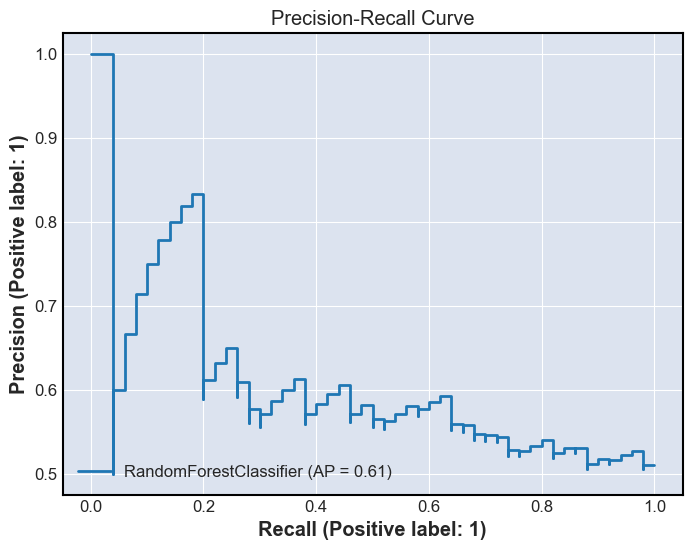

In [46]:
fig, ax = plt.subplots(figsize=(8, 6))
plot_precision_recall_curve(rf2, test[predictors], test['Target'], ax=ax)
ax.set_title("Precision-Recall Curve")
plt.show()

# Overall Results

Results and
analysis section
goes above
expectations. E.g.
includes a
summary with
basic results and
analysis and three
of the following:
good amount of
visualizations or
tries different
evaluation metrics
or iterates
training/evaluating
and improving
performance or
shows/discusses
model
performance

# Conclusion

Discussion and
conclusion section
goes above
expectations.
E.g. includes three
of the following:
discussion of
learning and
takeaways or
discussion of why
something didn’t
work or suggests
ways to improve.

# Resources
- https://pypi.org/project/yfinance/
- https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56#:~:text=A%20confusion%20matrix%20is%20a,the%20columns%20represent%20predicted%20labels.

S&P500 History
- https://www.investopedia.com/ask/answers/041015/what-history-sp-500.asp

Bollinger Bands
- https://medium.com/codex/how-to-calculate-bollinger-bands-of-a-stock-with-python-f9f7d1184fc3

Simple Moving Averages
- https://sohan-dillikar.medium.com/buy-and-sell-signals-with-the-simple-moving-average-crossover-8a51c9fa3e0a